# 사람인 - 채택

## 사람인 목록 가져오기

In [41]:

from bs4 import BeautifulSoup
import requests
import pandas as pd

# 데이터를 받을 리스트
cor_id = []
cor_txt = []
cor_url = []
title_txt = []
title_url = []
tag_ls = []

# 이전 크롤링 id 가져옴
file_path2 = r'C:\sesac_lagchain\project4\saramin_5_not_img2txt.csv'
check_url = pd.read_csv(file_path2)['id']
checK_url_ls = [i for i in check_url]

file_path3 = r'C:\sesac_lagchain\project4\saramin_5_not_img2txt2.csv'
check_url2 = pd.read_csv(file_path2)['id']
checK_url_ls2 = [i for i in check_url2]

# 크롤링 시작작
for i in range(1,6):
    url = f'https://www.saramin.co.kr/zf_user/jobs/list/domestic?loc_mcd=101000&panel_type=&search_optional_item=n&search_done=y&panel_count=y&preview=y&page={i}&sort=RD&page_count=100'
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Safari/537.36'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    cor_div = soup.select('div.list_body > div')

    try:
        for cor_div_ls in cor_div:
            # 기업 정보 추출
            cor = cor_div_ls.select_one('div.box_item > div.company_nm > a')
            cor_id_attr = cor_div_ls.attrs['id']

            if cor_id_attr not in cor_id and cor_id_attr not in checK_url_ls and cor_id_attr not in checK_url_ls2:
                cor_id.append(cor_id_attr)
                
                if cor:  # cor가 존재하는지 확인
                    
                    cor_txt.append(cor.text.strip())
                    
                    cor_url.append('https://www.saramin.co.kr' + cor.attrs['href'])
                else:
                    cor_txt.append(cor_div_ls.select_one('div.box_item > div.company_nm').text)
                    cor_url.append('')

                # 공고 제목 정보 추출
                title = cor_div_ls.select_one('div.box_item > div.notification_info > div.job_tit > a')
                if title:  # title이 존재하는지 확인
                    title_txt.append(title.text.strip())
                    title_url.append('https://www.saramin.co.kr' + title.attrs['href'])
                else:
                    title_txt.append('')
                    title_url.append('')

                # 태그 정보 추출
                tag = cor_div_ls.select('div.box_item > div.notification_info > div.job_meta > span > span')
                if tag:  # 태그가 존재하는지 확인
                    tags = [t.text.strip() for t in tag]
                    tag_ls.append(tags)
                else:
                    tag_ls.append('')

    except Exception as e:
        print(f"오류 발생: {e}")

## 데이터 저장
col = ['id','기업명', '기업링크', '공고제목', '공고링크','태그']
data = pd.DataFrame(list(zip(cor_id,cor_txt,cor_url,title_txt,title_url,tag_ls)), columns=col)

In [42]:
print(len(cor_id))
print(data.head)

500
<bound method NDFrame.head of                id       기업명  \
0    rec-50311141   반석써치(주)   
1    rec-50311134      제이와이   
2    rec-50311133      제이와이   
3    rec-50311121    본관상상학원   
4    rec-50311114  헌터스그룹(주)   
..            ...       ...   
495  rec-50309955   (주)라온서치   
496  rec-50309954   (주)라온서치   
497  rec-50309950    (주)피플렙   
498  rec-50309949   (주)라온서치   
499  rec-50309948    (주)피플렙   

                                                  기업링크  \
0    https://www.saramin.co.kr/zf_user/company-info...   
1    https://www.saramin.co.kr/zf_user/company-info...   
2    https://www.saramin.co.kr/zf_user/company-info...   
3    https://www.saramin.co.kr/zf_user/company-info...   
4    https://www.saramin.co.kr/zf_user/company-info...   
..                                                 ...   
495  https://www.saramin.co.kr/zf_user/company-info...   
496  https://www.saramin.co.kr/zf_user/company-info...   
497  https://www.saramin.co.kr/zf_user/company-info...   
498  https://

## 기업 url가져오기

## 공고내용 가져오기 - selenium(채택)

In [43]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
import time

url_pd = data['공고링크']

url_ls = []
job_content = []
job_img_url = []

job_history = []
job_education = []
job_worktype = []
job_salary = []
job_rank = []
job_workingarea = []

job_openingdate = []
job_closingdate = []
job_howtoapply = []
job_applicationform = []
job_manager = []
job_contact = []

i = 1

for url in url_pd:
    # 크롬 드라이버 실행
    driver = webdriver.Chrome()
    driver.get(url)

    url_ls.append(url)
    # iframe으로 이동
    try:
        time.sleep(1)
        job_summary = driver.find_element(By.CSS_SELECTOR,'div.jv_summary')
        job_table = job_summary.find_elements(By.CSS_SELECTOR,'div > div > dl')
        for dl in job_table:
            if dl.find_element(By.CSS_SELECTOR,'dt').text == '경력':
                job_history.append(dl.find_element(By.CSS_SELECTOR,'dd').text.replace('상세보기','').strip())
            elif dl.find_element(By.CSS_SELECTOR,'dt').text == '학력':
                job_education.append(dl.find_element(By.CSS_SELECTOR,'dd').text.replace('상세보기','').strip())
            elif dl.find_element(By.CSS_SELECTOR,'dt').text == '근무형태':
                job_worktype.append(dl.find_element(By.CSS_SELECTOR,'dd').text.replace('상세보기','').strip())
            elif dl.find_element(By.CSS_SELECTOR,'dt').text == '급여':
                job_salary.append(dl.find_element(By.CSS_SELECTOR,'dd').text.replace('상세보기','').replace('근무형태','').strip())
            # elif '직급' in dl.find_element(By.CSS_SELECTOR,'dt').text:
            #     job_rank.append(dl.find_element(By.CSS_SELECTOR,'dd').text)
            elif dl.find_element(By.CSS_SELECTOR,'dt').text == '근무지역':
                job_workingarea.append(dl.find_element(By.CSS_SELECTOR,'dd').text.replace('지도','').strip())
        if len(job_history) != len(url):
            job_history.append('')
        elif len(job_education) != len(url):
            job_education.append('')
        elif len(job_worktype) != len(url):
            job_worktype.append('')
        elif len(job_salary) != len(url):
            job_salary.append('')
        elif len(job_rank) != len(url):
            job_rank.append('')
        elif len(job_workingarea) != len(url):
            job_workingarea.append('')
        # if len(job_table) == 6:
        #     job_history.append(job_table[0].text)
        #     job_education.append(job_table[1].text)
        #     job_worktype.append(job_table[2].text)
        #     job_salary.append(job_table[3].text)
        #     job_rank.append(job_table[4].text)
        #     job_workingarea.append(job_table[5].text)
        # else:
        #     job_history.append('')
        #     job_education.append('')
        #     job_worktype.append('')
        #     job_salary.append('')
        #     job_rank.append('')
        #     job_workingarea.append('')

        job_howto = driver.find_element(By.CSS_SELECTOR,'div.jv_howto')

        job_date = job_howto.find_elements(By.CSS_SELECTOR,'dl.info_period > dd')
        if len(job_date) == 2:
            job_openingdate.append(job_date[0].text)
            job_closingdate.append(job_date[1].text)
        else: 
            job_openingdate.append(job_date[0].text)
            job_closingdate.append('')

        job_apply_title = job_howto.find_elements(By.CSS_SELECTOR,'dl.guide > dt')
        job_apply_content = job_howto.find_elements(By.CSS_SELECTOR,'dl.guide > dd')
        job_apply_title_ls = [job_apply_i.text for job_apply_i in job_apply_title]
        job_apply_content_ls = [job_apply_i.text for job_apply_i in job_apply_content]
        job_apply = dict(zip(job_apply_title_ls,job_apply_content_ls))

        # if len(job_apply) == 4:
        #     job_howtoapply.append(job_apply[0].text)
        #     job_applicationform.append(job_apply[1].text)
        #     job_manager.append(job_apply[2].text)
        #     job_contact.append(job_apply[3].text)
        # else:
        #     job_howtoapply.append('')
        #     job_applicationform.append('')
        #     job_manager.append('')
        #     job_contact.append('')
        if '지원방법' in job_apply:
            job_howtoapply.append(job_apply['지원방법'])
        else:
            job_howtoapply.append('')
        if '접수양식' in job_apply:
            job_applicationform.append(job_apply['접수양식'])
        else:
            job_applicationform.append('')
        if '담당자' in job_apply:
            job_manager.append(job_apply['담당자'])
        else:
            job_manager.append('')
        if '연락처' in job_apply:
            job_contact.append(job_apply['연락처'])
        else:
            job_contact.append('')

        iframe = driver.find_element(By.TAG_NAME, "iframe")
        driver.switch_to.frame(iframe)

        images = driver.find_elements(By.TAG_NAME, "img")
        if images:
            # ✅ `src` 속성 가져오기
            image_urls = [img.get_attribute("src") for img in images if img.get_attribute("src")]
            job_img_url.append(image_urls)
        else:
            job_img_url.append('')

        # iframe 내부에서 원하는 요소 찾기 (예: <p> 태그)
        elements = driver.find_element(By.TAG_NAME, "body").text
        if elements:
            job_content.append(elements)
        else:
            job_content.append('')

    except NoSuchElementException:
        print("❌ `iframe`을 찾을 수 없습니다.")


    driver.quit()
    print(f'{i}번째 완료')

    i += 1

    time.sleep(2)


1번째 완료
2번째 완료
3번째 완료
4번째 완료
5번째 완료
6번째 완료
7번째 완료
8번째 완료
9번째 완료
10번째 완료
11번째 완료
12번째 완료
13번째 완료
14번째 완료
15번째 완료
16번째 완료
17번째 완료
18번째 완료
19번째 완료
20번째 완료
21번째 완료
22번째 완료
23번째 완료
24번째 완료
25번째 완료
26번째 완료
27번째 완료
28번째 완료
29번째 완료
30번째 완료
31번째 완료
32번째 완료
33번째 완료
34번째 완료
35번째 완료
36번째 완료
37번째 완료
38번째 완료
39번째 완료
40번째 완료
41번째 완료
42번째 완료
43번째 완료
44번째 완료
45번째 완료
46번째 완료
47번째 완료
48번째 완료
49번째 완료
50번째 완료
51번째 완료
52번째 완료
53번째 완료
54번째 완료
55번째 완료
56번째 완료
57번째 완료
58번째 완료
59번째 완료
60번째 완료
61번째 완료
62번째 완료
63번째 완료
64번째 완료
65번째 완료
66번째 완료
67번째 완료
68번째 완료
69번째 완료
70번째 완료
71번째 완료
72번째 완료
73번째 완료
74번째 완료
75번째 완료
76번째 완료
77번째 완료
78번째 완료
79번째 완료
80번째 완료
81번째 완료
82번째 완료
83번째 완료
84번째 완료
85번째 완료
86번째 완료
87번째 완료
88번째 완료
89번째 완료
90번째 완료
91번째 완료
92번째 완료
93번째 완료
94번째 완료
95번째 완료
96번째 완료
97번째 완료
98번째 완료
99번째 완료
100번째 완료
101번째 완료
102번째 완료
103번째 완료
104번째 완료
105번째 완료
106번째 완료
107번째 완료
108번째 완료
109번째 완료
110번째 완료
111번째 완료
112번째 완료
113번째 완료
114번째 완료
115번째 완료
116번째 완료
117번째 완료
118번째 완료
119번째 완료
120번째 완료
121번째 완료
122번째 완료
123번째 완료
1

Exception ignored in: <function Service.__del__ at 0x0000016907385760>
Traceback (most recent call last):
  File "c:\Users\seul\AppData\Local\pypoetry\Cache\virtualenvs\langchain-kr-hGK6LnUe-py3.11\Lib\site-packages\selenium\webdriver\common\service.py", line 200, in __del__
    self.stop()
  File "c:\Users\seul\AppData\Local\pypoetry\Cache\virtualenvs\langchain-kr-hGK6LnUe-py3.11\Lib\site-packages\selenium\webdriver\common\service.py", line 157, in stop
    self.send_remote_shutdown_command()
  File "c:\Users\seul\AppData\Local\pypoetry\Cache\virtualenvs\langchain-kr-hGK6LnUe-py3.11\Lib\site-packages\selenium\webdriver\common\service.py", line 137, in send_remote_shutdown_command
    request.urlopen(f"{self.service_url}/shutdown")
  File "C:\Users\seul\.pyenv\pyenv-win\versions\3.11.9\Lib\urllib\request.py", line 216, in urlopen
    return opener.open(url, data, timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\seul\.pyenv\pyenv-win\versions\3.11.9\Lib\urllib\reques

WebDriverException: Message: unknown error: net::ERR_CONNECTION_TIMED_OUT
  (Session info: chrome=134.0.6998.119)
Stacktrace:
	GetHandleVerifier [0x00007FF736B84C25+3179557]
	(No symbol) [0x00007FF7367E88A0]
	(No symbol) [0x00007FF7366791CA]
	(No symbol) [0x00007FF736675B57]
	(No symbol) [0x00007FF7366668E9]
	(No symbol) [0x00007FF736668658]
	(No symbol) [0x00007FF736666BF6]
	(No symbol) [0x00007FF736666676]
	(No symbol) [0x00007FF73666633A]
	(No symbol) [0x00007FF736663EC2]
	(No symbol) [0x00007FF7366647AC]
	(No symbol) [0x00007FF73667D01A]
	(No symbol) [0x00007FF7367211AE]
	(No symbol) [0x00007FF7366F7C2A]
	(No symbol) [0x00007FF7367202F3]
	(No symbol) [0x00007FF7366F7A03]
	(No symbol) [0x00007FF7366C06D0]
	(No symbol) [0x00007FF7366C1983]
	GetHandleVerifier [0x00007FF736BE67CD+3579853]
	GetHandleVerifier [0x00007FF736BFD1D2+3672530]
	GetHandleVerifier [0x00007FF736BF2153+3627347]
	GetHandleVerifier [0x00007FF73695092A+868650]
	(No symbol) [0x00007FF7367F2FFF]
	(No symbol) [0x00007FF7367EF4A4]
	(No symbol) [0x00007FF7367EF646]
	(No symbol) [0x00007FF7367DEAA9]
	BaseThreadInitThunk [0x00007FFEA07CE8D7+23]
	RtlUserThreadStart [0x00007FFEA0FBBF6C+44]


In [44]:

col2 = [
    '공고링크',
    '경력',
    '학력',
    '근무형태',
    '급여',
    # '직급',
    '근무지역',
    '지원시작일',
    '지원마감일',
    '지원방법',
    '접수양식',
    '담당자',
    '연락처',
    '공고내용',
    '공고내용이미지url']
data2 = pd.DataFrame(list(zip(url_pd,
                        job_history,
                        job_education,
                        job_worktype,
                        job_salary,
                        # job_rank,
                        job_workingarea,
                        job_openingdate,
                        job_closingdate,
                        job_howtoapply,
                        job_applicationform,
                        job_manager,
                        job_contact,
                        job_content,
                        job_img_url)), columns=col2)



In [46]:
merged_data = pd.merge(data[:303], data2, on='공고링크', how='left')
merged_data.to_csv('saramin_5_not_img2txt3.csv', index=False,encoding='utf-8-sig')

merged_data.head

<bound method NDFrame.head of                id           기업명  \
0    rec-50311141       반석써치(주)   
1    rec-50311134          제이와이   
2    rec-50311133          제이와이   
3    rec-50311121        본관상상학원   
4    rec-50311114      헌터스그룹(주)   
..            ...           ...   
298  rec-50310436         한스컨설팅   
299  rec-50310435       (주)테르토엔   
300  rec-50310430         한스컨설팅   
301  rec-50310427  (주)에이치알비즈코리아   
302  rec-50310426         한스컨설팅   

                                                  기업링크  \
0    https://www.saramin.co.kr/zf_user/company-info...   
1    https://www.saramin.co.kr/zf_user/company-info...   
2    https://www.saramin.co.kr/zf_user/company-info...   
3    https://www.saramin.co.kr/zf_user/company-info...   
4    https://www.saramin.co.kr/zf_user/company-info...   
..                                                 ...   
298  https://www.saramin.co.kr/zf_user/company-info...   
299  https://www.saramin.co.kr/zf_user/company-info...   
300  https://www.saramin.co

# img2txt

### ocr

0 번째 처리 시작: 
현재 img2txt 리스트 길이: 1
1 번째 처리 시작: ['https://www.saraminimage.co.kr/sri/vix/template/toptype/marketing1.png']
현재처리중인img ['https://www.saraminimage.co.kr/sri/vix/template/toptype/marketing1.png']
현재 img2txt 리스트 길이: 2
2 번째 처리 시작: ['https://www.saraminimage.co.kr/sri/vix/template/toptype/marketing2.png']
현재처리중인img ['https://www.saraminimage.co.kr/sri/vix/template/toptype/marketing2.png']
현재 img2txt 리스트 길이: 3
3 번째 처리 시작: 
현재 img2txt 리스트 길이: 4
4 번째 처리 시작: 
현재 img2txt 리스트 길이: 5
5 번째 처리 시작: 
현재 img2txt 리스트 길이: 6
6 번째 처리 시작: ['https://pds.saramin.co.kr/recruit/recruit/202503/23/stk68u17_y5up-1ppc1qh_recruit.png']
현재처리중인img ['https://pds.saramin.co.kr/recruit/recruit/202503/23/stk68u17_y5up-1ppc1qh_recruit.png']
현재 img2txt 리스트 길이: 7
7 번째 처리 시작: 
현재 img2txt 리스트 길이: 8
8 번째 처리 시작: 
현재 img2txt 리스트 길이: 9
9 번째 처리 시작: 
현재 img2txt 리스트 길이: 10
10 번째 처리 시작: 
현재 img2txt 리스트 길이: 11
11 번째 처리 시작: ['https://www.saraminimage.co.kr/sri/vix/template/toptype/design2.png']
현재처리중인img ['https://www.saramin
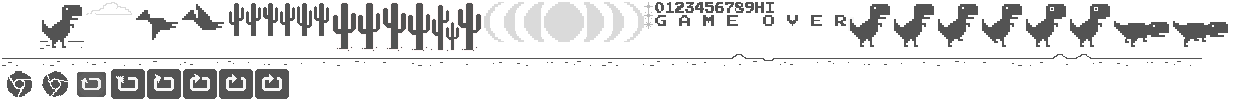
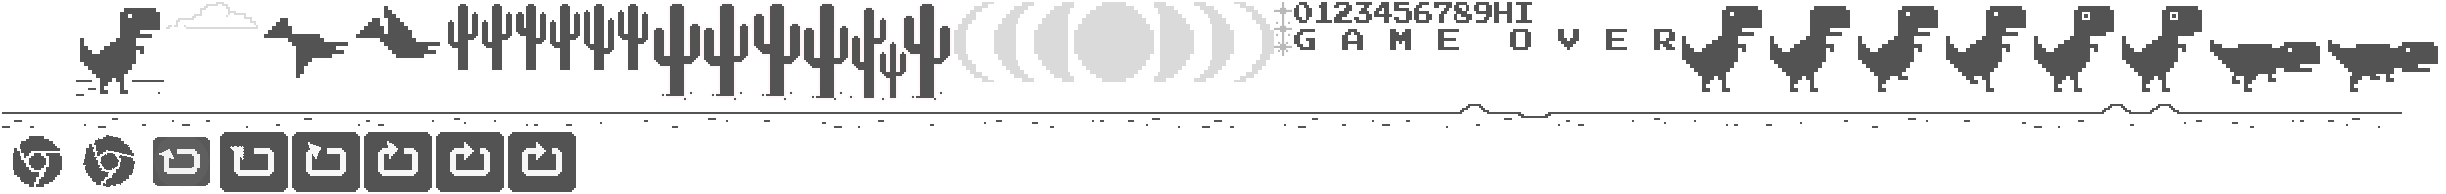
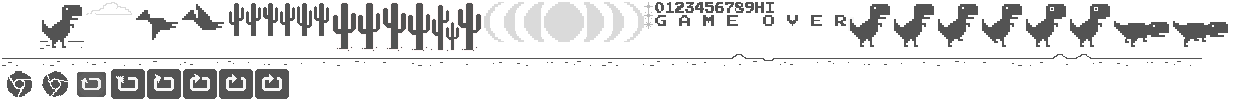
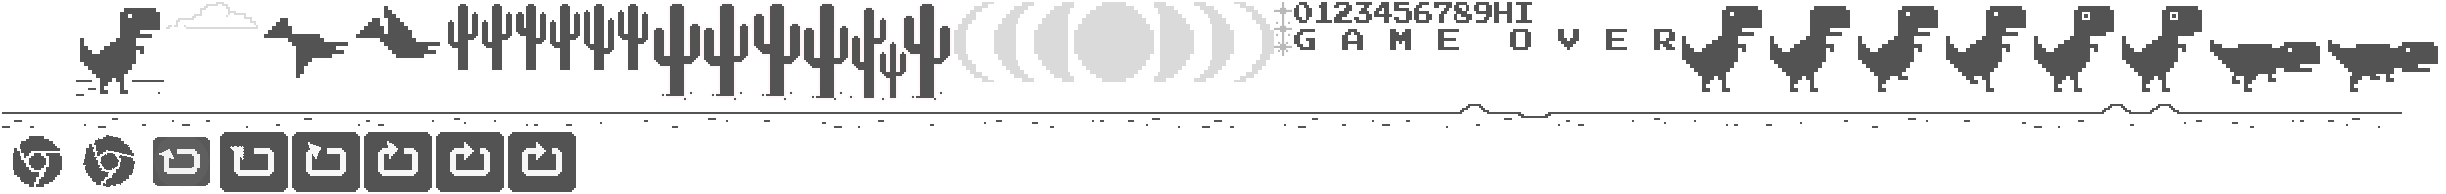
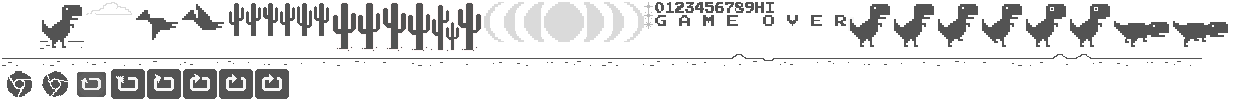
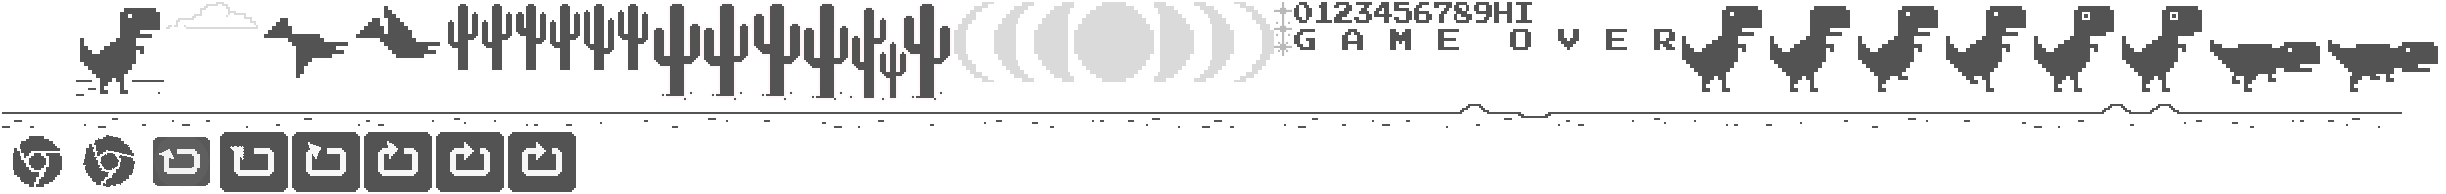
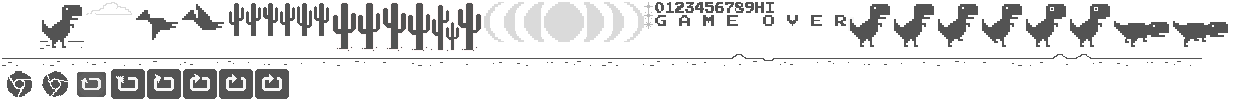
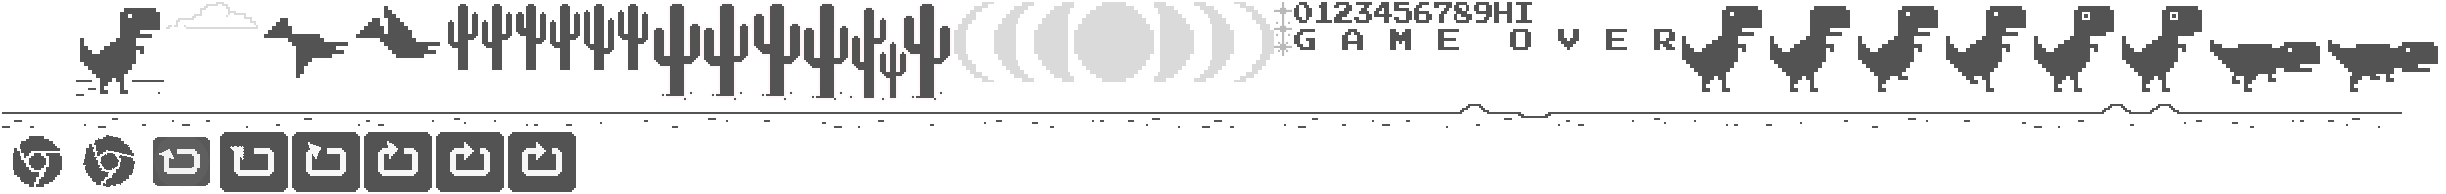

In [47]:
import pandas as pd
import models
from langchain_openai import ChatOpenAI
import cv2
import numpy as np
import pytesseract
import requests
from io import BytesIO
import os
import openai
from dotenv import load_dotenv
import certifi

# Tesseract 실행 파일 경로 설정 (Windows)
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"




# **1️⃣ URL에서 이미지 다운로드**
import requests
import numpy as np
import cv2
import pytesseract
import certifi

def ocr(image_url):
    response = requests.get(image_url, verify=certifi.where())
    image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    # **그레이스케일 변환 (색상 제거)**
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # **샤프닝 적용 (흐릿한 글씨 선명하게)**
    sharpen = cv2.GaussianBlur(gray, (0, 0), 3)
    sharpen = cv2.addWeighted(gray, 1.5, sharpen, -0.5, 0)

    # **노이즈 제거 (가우시안 블러 적용)**
    blur = cv2.GaussianBlur(sharpen, (3, 3), 0)

    # **이진화 처리 (Threshold 적용 - 배경 제거)**
    _, binary = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # **OCR 실행 (한국어 + 영어)**
    custom_config = r'--oem 3 --psm 6'
    text = pytesseract.image_to_string(binary, lang="kor+eng", config=custom_config)

    return text.strip()



def chunk_text(text, max_length=1000):
    words = text.split()
    chunks = []
    current_chunk = []
    current_length = 0
    
    for word in words:
        if current_length + len(word) + 1 > max_length:
            chunks.append(" ".join(current_chunk))
            current_chunk = []
            current_length = 0
        current_chunk.append(word)
        current_length += len(word) + 1
    
    if current_chunk:
        chunks.append(" ".join(current_chunk))
    
    return chunks

# .env 파일 로드
load_dotenv('C:\\sesac_lagchain\\.env')

# 환경 변수에서 OpenAI API 키 가져오기
api_key = os.getenv("OPENAI_API_KEY")
client = openai.OpenAI(api_key=api_key)

# 시스템과 사용자 프롬프트 설정
system_prompt = """
당신은 OCR로 변환된 문서를 사람이 읽기 쉽게 정제하는 역할을 합니다.  
"""

user_prompt = """
다음의 원칙을 따릅니다. 
1. **띄어쓰기 및 문장 구조 수정**  
   - 단어를 추가하거나 수정하지 않고, 띄어쓰기만 자연스럽게 조정하여 원본 텍스트를 최대한 유지합니다. 
   - 문장이 어색하거나 잘못된 문법이 있으면 올바르게 수정합니다.  

2. **가독성 향상**  
   - 문장을 논리적으로 정리하여 가독성을 높이고, 목차가 있다면 구분하여 표시하세요. 단, 주어진 문서의 단어 외의 단어는 절대 추가하지 마세요.   

3. **목차 및 섹션 정리**  
   - 제목과 본문을 명확하게 구분합니다.  
   - 관련된 내용을 묶어서 단락을 구성합니다.  

4. **불필요한 기호 및 잘못된 OCR 인식 수정**  
   - 의미 없는 특수문자, 깨진 문자(예: @, #, %) 등을 제거합니다.  
   - 잘못 인식된 단어를 원래 의미에 맞게 수정합니다.
"""

def analyze_text(extracted_text):
    chunks = chunk_text(extracted_text)
    results = []
    
    for chunk in chunks:
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": user_prompt},
                {"role": "user", "content": chunk}
            ],
            max_tokens=500,
            temperature=0.7
        )
        results.append(response.choices[0].message.content)
    
    return "\n".join(results)

def process_image_urls(image_urls):
    all_text = ""
    if type(image_urls) == list:
        for image_url in image_urls:
            text = ocr(image_url)
            all_text += text + "\n"  # 결과를 결합 (공백으로 구분)
    else:
        all_text = ''
    print('현재처리중인img',image_urls)
    return all_text.strip()


def str2url(url):
    if type(url) == str:
        str2url = url.replace(r'\n','').replace("['","").replace("']","").replace("'",'').split(',')
    else:
        str2url = url
    return str2url


# # CSV 파일 읽기
# try:
#     file_path = r"C:\sesac_lagchain\project4\saramin_5_not_img2txt.csv"

#     url_df = pd.read_csv(file_path)


#     # 🔹 1️⃣ CSV 컬럼 확인
#     print(f"✅ CSV 컬럼 목록: {list(url_df.columns)}")
    
#     if '공고내용이미지url' not in url_df.columns:
#         raise ValueError("❌ CSV 파일에 '공고내용이미지url' 컬럼이 존재하지 않습니다.")
    
#     # 🔹 2️⃣ URL 문자열 -> 리스트 변환 확인
#     url_df['공고내용이미지url'] = url_df['공고내용이미지url'].apply(str2url)
   
#     # 🔹 3️⃣ OCR 실행 및 'img2txt' 컬럼 추가
#     url_df['img2txt'] = url_df['공고내용이미지url'].apply(process_image_urls)
#     print(f"✅ OCR 변환 완료! 새로운 컬럼 추가됨: 'img2txt'")
    
# except Exception as e:
#     print(f"🚨 오류 발생: {e}")

# # 🔹 4️⃣ 최종 데이터 확인

# url_df.to_csv('saramin_5_with_img2txt.csv', index=False,encoding='utf-8-sig')

import pandas as pd  # NaN 체크를 위해 필요

img2txt = []

# CSV 파일 불러오기
file_path = r"C:\sesac_lagchain\project4\saramin_5_not_img2txt3.csv"
url_df = pd.read_csv(file_path)

# NaN 값을 빈 문자열로 변환
url_df = url_df.fillna('')

# 이미지 URL 처리
for idx, url in enumerate(url_df['공고내용이미지url']):
    print(idx, '번째 처리 시작:', url)

    try:
        # 빈 문자열인지 확인 (NaN은 이미 제거됨)
        if url == '':
            img2txt.append('')  # 빈 값 추가
        else:
            str2url_text = str2url(url)
            img2txt.append(process_image_urls(str2url_text))

    except Exception as e:
        print(f'🚨 오류 발생: {e} (URL: {url})')
        img2txt.append('')  # 오류 발생 시 빈 문자열 추가

    print(f"현재 img2txt 리스트 길이: {len(img2txt)}")

print("✅ img2txt 변환 완료!")



In [48]:

# 새로운 DataFrame 생성 (id 칼럼과 img2txt 리스트 추가)
result_df = pd.DataFrame({
    'id': url_df['id'],       # 기존 DataFrame의 id 컬럼
    'img2txt': img2txt        # 변환된 텍스트 리스트
})


# id를 기준으로 LEFT JOIN 수행
merged_df = url_df.merge(result_df, on='id', how='left')

# 결과 확인
print(merged_df.head())

# CSV 파일로 저장 (원하는 경로 지정)
merged_df.to_csv(r"C:\sesac_lagchain\project4\saramin_5_with_img2txt3.csv", index=False,encoding='utf-8-sig')



             id       기업명                                               기업링크  \
0  rec-50311141   반석써치(주)  https://www.saramin.co.kr/zf_user/company-info...   
1  rec-50311134      제이와이  https://www.saramin.co.kr/zf_user/company-info...   
2  rec-50311133      제이와이  https://www.saramin.co.kr/zf_user/company-info...   
3  rec-50311121    본관상상학원  https://www.saramin.co.kr/zf_user/company-info...   
4  rec-50311114  헌터스그룹(주)  https://www.saramin.co.kr/zf_user/company-info...   

                        공고제목  \
0     [패선 강소기업] 스타일리스트 MD 채용   
1  [엔프프 nff] 콘텐츠 마케터 채용 (경력)   
2    [nff 엔프프] 온라인MD 채용 (경력)   
3     중등부~고1 수학 선생님 강사 모집합니다   
4    [구로][국내 중견기업] R&D(모바일앱)   

                                                공고링크  \
0  https://www.saramin.co.kr/zf_user/jobs/relay/v...   
1  https://www.saramin.co.kr/zf_user/jobs/relay/v...   
2  https://www.saramin.co.kr/zf_user/jobs/relay/v...   
3  https://www.saramin.co.kr/zf_user/jobs/relay/v...   
4  https://www.saramin.co.kr/zf_user/jobs/rela

## 공고 내용 정제

In [51]:
import openai
import os
from dotenv import load_dotenv
import pandas as pd

# .env 파일 로드
load_dotenv()

# 환경 변수에서 OpenAI API 키 가져오기
api_key = os.getenv("OPENAI_API_KEY")
client = openai.OpenAI(api_key=api_key)



# 기능 구현 함수
def askGpt(text, apikey):
    prompt = f'''
        당신은 채용 공고를 정리하는 데 특화된 전문 인력입니다. 주어지는 "text"를 아래 양식에 맞춰 정리해주세요. 
        내용이 없을 경우에는 "해당 사항 없음"으로 명시적으로 표시해주세요.

        [채용 공고 내용]
        채용 공고의 내용을 아래와 같은 형식으로 요약하여 제공해주세요:
        채용인원: (채용인원 수)
        근무형태: (근무 형태: 정규직,계약직,인턴 등)
        직급: (직급)
        근무일시: (근무 일시: 9:00-18:00 등)
        근무지역: (근무지 주소)
        전형절차: (전형 절차)
        접수방법: (접수 방법)


        [채용 공고 주요 내용]
        채용 공고의 상세 내용도 아래와 같은 형식으로 요약하여 제공해주세요:
        - 주요 업무: (주요 업무에 대한 설명)
        - 자격 요건: (필수 자격 요건)
        - 우대 사항: (우대하는 조건)

        [그 외]
        - 그 외 정보 : (채용 공고 내용, 채용 공고 주요 내용에 해당하지 않는 텍스트를 목차를 이용하여 가독성 좋게 요약하세요)

        주어진 텍스트: {text}
        '''

    response = client.chat.completions.create(
        model="gpt-4o-mini",  # 올바른 모델명
        messages=[{"role": "user", "content": prompt}],
        
    )

    gptResponse = response.choices[0].message.content
    return gptResponse

file_path = r"C:\sesac_lagchain\project4\saramin_5_with_img2txt3.csv"

url_df = pd.read_csv(file_path)


# 정제 적용
url_df["refined_content"] = url_df.apply(
    lambda row: askGpt(str(row['공고제목']) + " " + str(row['공고내용']) + " " + str(row['img2txt']), api_key), axis=1
)

# 결과 저장
url_df.to_csv('saramin_5_with_refinedtxt3.csv', index=False,encoding='utf-8-sig')

print(f"✅결과 파일 저장됨")

✅결과 파일 저장됨


In [56]:
import pandas as pd

# 첫 번째 CSV 파일 로드
df1 = pd.read_csv("saramin_5_with_refinedtxt.csv")

# 두 번째 CSV 파일 로드
df2 = pd.read_csv("saramin_5_with_refinedtxt2.csv")

df3 = pd.read_csv("saramin_5_with_refinedtxt3.csv")
# 두 데이터프레임을 아래쪽으로 합치기 (행 추가)
df_combined = pd.concat([df1, df2,df3], ignore_index=True)

# 결과 저장 (선택 사항)
df_combined.to_csv("saramin_5_combined.csv", index=False,encoding='utf-8-sig')

print(df_combined)


                id                    기업명  \
0     rec-50307134                 (주)피플렙   
1     rec-50307125                 (주)피플렙   
2     rec-50307124               (주)타임바이오   
3     rec-50307121               (주)타임바이오   
4     rec-50307076  \n(주)리디아컴퍼니\n관심기업 등록    
...            ...                    ...   
1329  rec-50310436                  한스컨설팅   
1330  rec-50310435                (주)테르토엔   
1331  rec-50310430                  한스컨설팅   
1332  rec-50310427           (주)에이치알비즈코리아   
1333  rec-50310426                  한스컨설팅   

                                                   기업링크  \
0     https://www.saramin.co.kr/zf_user/company-info...   
1     https://www.saramin.co.kr/zf_user/company-info...   
2     https://www.saramin.co.kr/zf_user/company-info...   
3     https://www.saramin.co.kr/zf_user/company-info...   
4                                                   NaN   
...                                                 ...   
1329  https://www.saramin.co.kr/zf_user/compan

## 직급 수정

In [8]:
import openai
import os
from dotenv import load_dotenv
import pandas as pd

# .env 파일 로드
load_dotenv()

# 환경 변수에서 OpenAI API 키 가져오기
api_key = os.getenv("OPENAI_API_KEY")

# OpenAI 클라이언트 생성 (최신 버전 방식)
client = openai.OpenAI(api_key=api_key)

# 기능 구현 함수
def askGpt(text):
    prompt = f'''
    당신은 주어진 텍스트의 '직급:(직급)'의 내용을 수정하는 업무를 받았습니다. 
    [채용 공고 내용]의 '직급'과 관련된 내용만 삭제하세요.
    단어를 수정하거나 재건축, 구조 변경은 엄격히 금지합니다.

    주어진 텍스트: {text}

    **출력 형식**
    [채용 공고 내용]
    - 채용 공고 내용
    [채용 공고 주요 내용]
    -채용 공고 주요 내용
    [그 외]
    -그 외 내용

    '''

    response = client.chat.completions.create(
        model="gpt-4o-mini",  # 최신 버전에서 'gpt-4o-mini'가 아니라 'gpt-4o' 사용 추천
        messages=[{"role": "user", "content": prompt}]
    )
    gptreturn = response.choices[0].message.content
    print(gptreturn)
    return gptreturn

# 📂 파일 경로 설정 (.xlsx 파일 전용)
file_path = r"C:\sesac_lagchain\project4\saramin_5_combined.csv"

# 📊 엑셀 파일 불러오기
url_df = pd.read_csv(file_path)

# 'refined_content' 컬럼 확인 후 적용

url_df["refined_content_revised"] = url_df["refined_content"].apply(askGpt)

url_df.to_csv("saramin_5_combined_revised.csv", index=False,encoding='utf-8-sig')


[채용 공고 내용]  
채용인원: 2명  
근무형태: 정규직  
근무일시: 해당 사항 없음  
근무지역: 서울 영등포구  
전형절차: 해당 사항 없음  
접수방법: 해당 사항 없음  

[채용 공고 주요 내용]  
- 주요 업무: RF 회로 및 PCB 설계, 계측기를 이용한 튜닝 및 시험, 시뮬레이션 툴을 이용한 분석, 산출물 및 보고서 작성  
- 자격 요건: 전문학사 이상, 관련 경력 (팀장: 12~20년 미만, 팀원: 5~10년 정도), 해외 및 지방 출장 가능, 공공기관 및 군기관에 결격 사유가 없는 사람, 업무상 신원조회 시 결격 사유가 없는 사람, 성실함과 긍정적 사고를 가진 사람, 도전적이고 합리적인 자세를 가진 사람, 동료들과 소통하며 성장할 수 있는 사람, 정보통신에 대한 기초 지식과 자기 역량 향상을 위한 의지가 있는 사람, RF 회로 설계(OrCAD), PCB(PADS) Artwork 가능자, 주파수 생성부, 하향/상향 변환부 설계 경험자, MW 시뮬레이션(CST MW Studio) 사용 설계 가능자  
- 우대 사항: 무선설비 및 정보통신 관련 자격증 소지자, 주파수 변환부 및 합성부 설계 경험자, 방산업무 경험자(경력), PM 업무 수행 가능자(경력)  

[그 외]  
- 그 외 정보: 마감일은 2025년 4월 6일(일요일)입니다.  
[채용 공고 내용]  
채용인원: 해당 사항 없음  
근무형태: 정규직  
근무일시: 유연 근무제 (주 40시간)  
근무지역: 서울 강남구 삼성로85길 26 5층  
전형절차: 서류 전형 → 비대면 인터뷰 → 직무 인터뷰 → 컬처핏 인터뷰 → 처우 협의  
접수방법: 자유 양식의 이력서 및 자기소개서, 포트폴리오 제출

[채용 공고 주요 내용]  
- 주요 업무: CCTV 데이터를 수집하고 분석하는 시스템의 백엔드 개발, 모델 검증 및 학습을 위한 데이터 파이프라인 개발, 백오피스 성능 모니터링 시스템 개발 및 최적화  
- 자격 요건: Python에 능숙하고 Django, FastAPI 등 REST 